$\color{yellow}{\text{Importy niezbędnych bibliotek}}$

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

## $\color{yellow}{\text{Zadanie 1.}}$

a) wzór (1)

In [85]:
def f(x):
    return np.tan(x)

def f_real_derivative(x):
    return 1 + np.tan(x)**2

def second_tan_derivative(x):
    return 2 * (np.tan(x)**2 + 1) * np.tan(x)

# Wartości teoretyczne i konfiguracja
x = 1
epsilon = np.finfo(float).eps
M = second_tan_derivative(x)
h_min_theoretical = 2 * np.sqrt(epsilon / M)
h_values = np.logspace(0, -16, 17, base=10)

method_errors = []
numerical_errors = []
computational_errors = []

for h in h_values:
    numerical_derivative = (f(x + h) - f(x)) / h
    real_derivative = f_real_derivative(x)
    
    # Błąd metody
    method_error = M * h / 2
    method_errors.append(method_error)

    # Błąd numeryczny
    numerical_error = 2 * epsilon / h
    numerical_errors.append(numerical_error)

    # Błąd obliczeniowy
    computational_error = abs(numerical_derivative - real_derivative)
    computational_errors.append(computational_error)

lowest_error = min(computational_errors)
h_min_empirical = h_values[computational_errors.index(lowest_error)]
lowest_error_relative = abs(lowest_error - f_real_derivative(h_min_empirical)) / f_real_derivative(h_min_empirical)

Analiza wyników

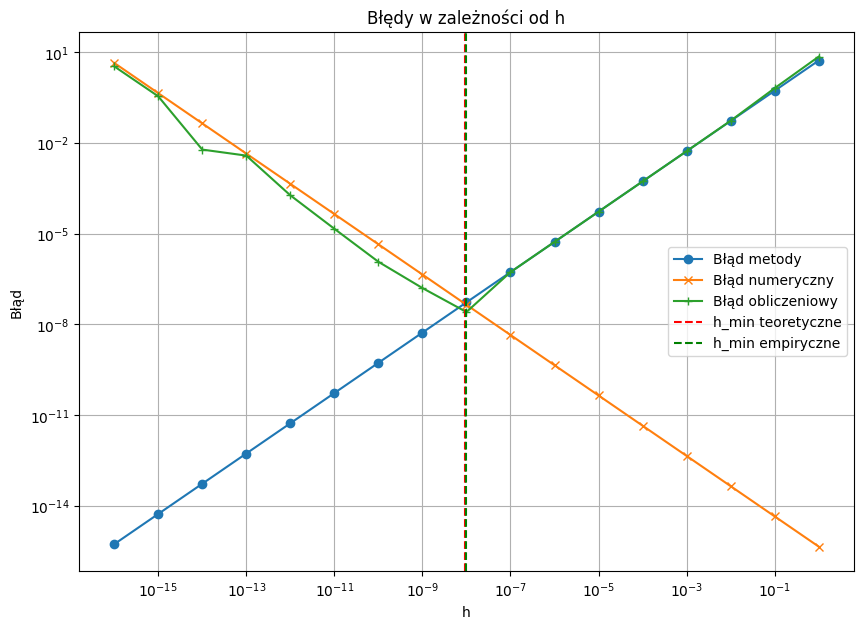

In [86]:
plt.figure(figsize=(10, 7))
plt.loglog(h_values, method_errors, label='Błąd metody', marker='o')
plt.loglog(h_values, numerical_errors, label='Błąd numeryczny', marker='x')
plt.loglog(h_values, computational_errors, label='Błąd obliczeniowy', marker='+')
plt.axvline(h_min_theoretical, color='r', linestyle='--', label='h_min teoretyczne')
plt.axvline(h_min_empirical, color='g', linestyle='--', label='h_min empiryczne')
plt.xlabel('h')
plt.ylabel('Błąd')
plt.title('Błędy w zależności od h')
plt.legend()
plt.grid()

plt.show()

In [87]:
h_diff = abs(h_min_empirical - h_min_theoretical)
relative_error = h_diff / h_min_theoretical * 100

print(f'Różnica między teoretycznym h_min a wyznaczonym empirycznie wynosi: {h_diff:.1e}, błąd względny: {round(relative_error, 2)}%. Błąd wyniósł {lowest_error}.')

Różnica między teoretycznym h_min a wyznaczonym empirycznie wynosi: 8.8e-10, błąd względny: 9.6%. Błąd wyniósł 2.554135258847623e-08.


b) z użyciem wzoru różnic centralnych (3)

In [88]:
def f(x):
    return np.tan(x)

def f_real_derivative(x):
    return 1 + np.tan(x)**2

def third_tan_derivative(x):
    return 2 * (1 + np.tan(x)**2) * (1 + 3 * np.tan(x)**2)

# Wartości teoretyczne i konfiguracja
x = 1
epsilon = np.finfo(float).eps
M = third_tan_derivative(x)
h_min_theoretical_central = (3 * epsilon / M) ** (1/3)

method_errors_central = []
numerical_errors_central = []
computational_errors_central = []

for h in h_values:
    numerical_derivative = (f(x + h) - f(x - h)) / (2*h)
    real_derivative = f_real_derivative(x)
    
    # Błąd metody
    method_error_central = M * h**2 / 6
    method_errors_central.append(method_error_central)

    # Błąd numeryczny
    numerical_error_central = epsilon / h
    numerical_errors_central.append(numerical_error_central)

    # Błąd obliczeniowy
    computational_error_central = abs(numerical_derivative - real_derivative)
    computational_errors_central.append(computational_error_central)

lowest_error_central = min(computational_errors_central)
h_min_empirical_central = h_values[computational_errors_central.index(lowest_error_central)]

Analiza wyników

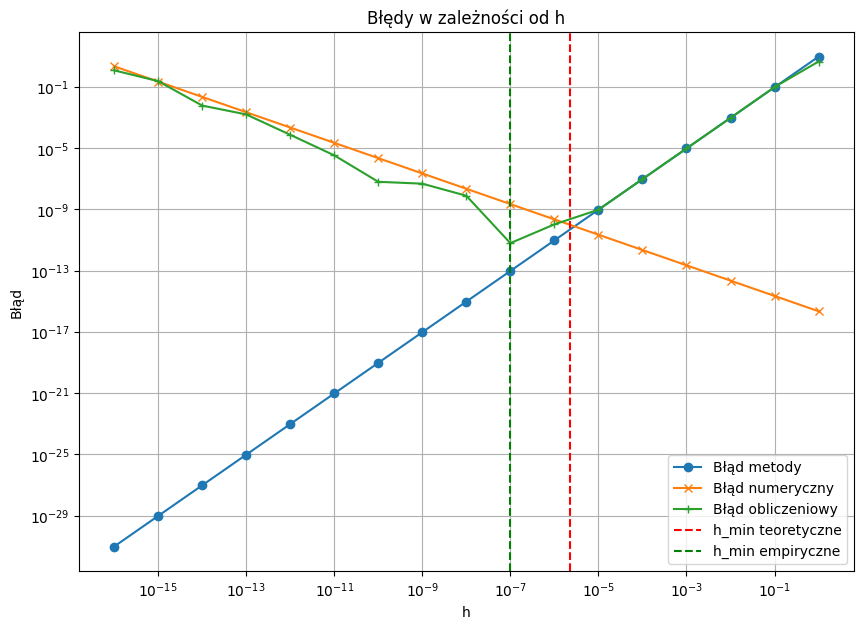

In [89]:
plt.figure(figsize=(10, 7))
plt.loglog(h_values, method_errors_central, label='Błąd metody', marker='o')
plt.loglog(h_values, numerical_errors_central, label='Błąd numeryczny', marker='x')
plt.loglog(h_values, computational_errors_central, label='Błąd obliczeniowy', marker='+')
plt.axvline(h_min_theoretical_central, color='r', linestyle='--', label='h_min teoretyczne')
plt.axvline(h_min_empirical_central, color='g', linestyle='--', label='h_min empiryczne')
plt.xlabel('h')
plt.ylabel('Błąd')
plt.title('Błędy w zależności od h')
plt.legend()
plt.grid()

plt.show()

In [90]:
h_diff_central = abs(h_min_empirical_central - h_min_theoretical_central)
relative_error_central = h_diff_central / h_min_theoretical_central * 100

print(f'Różnica między teoretycznym h_min a wyznaczonym empirycznie wynosi: {h_diff_central:.1e}, błąd względny: {round(relative_error_central, 2)}%. Błąd wyniósł {lowest_error_central}.')

Różnica między teoretycznym h_min a wyznaczonym empirycznie wynosi: 2.2e-06, błąd względny: 95.6%. Błąd wyniósł 6.2230220976289274e-12.


## $\color{yellow}{\text{Zadanie 2.}}$

In [91]:
def generate_sequence(n, d_type):
    if n < 2:
        raise ValueError('n must be greater or equal 2')
    seq = np.zeros(n, dtype=d_type)
    seq[0] = d_type(1/3)
    seq[1] = d_type(1/12)
    
    for i in range(2, n):
        seq[i] = d_type(2.25) * seq[i - 1] - d_type(0.5) * seq[i - 2]
    return seq

n_single = 225
n_double = 60
n_fractions = 225

single = generate_sequence(n_single, np.float32)
double = generate_sequence(n_double, np.float64)
fractions = generate_sequence(n_fractions, Fraction)

C:\Users\Jakub\AppData\Local\Temp\ipykernel_10964\3287825097.py:9: RuntimeWarning: overflow encountered in scalar multiply
  seq[i] = d_type(2.25) * seq[i - 1] - d_type(0.5) * seq[i - 2]
C:\Users\Jakub\AppData\Local\Temp\ipykernel_10964\3287825097.py:9: RuntimeWarning: invalid value encountered in scalar subtract
  seq[i] = d_type(2.25) * seq[i - 1] - d_type(0.5) * seq[i - 2]


Analiza błędów

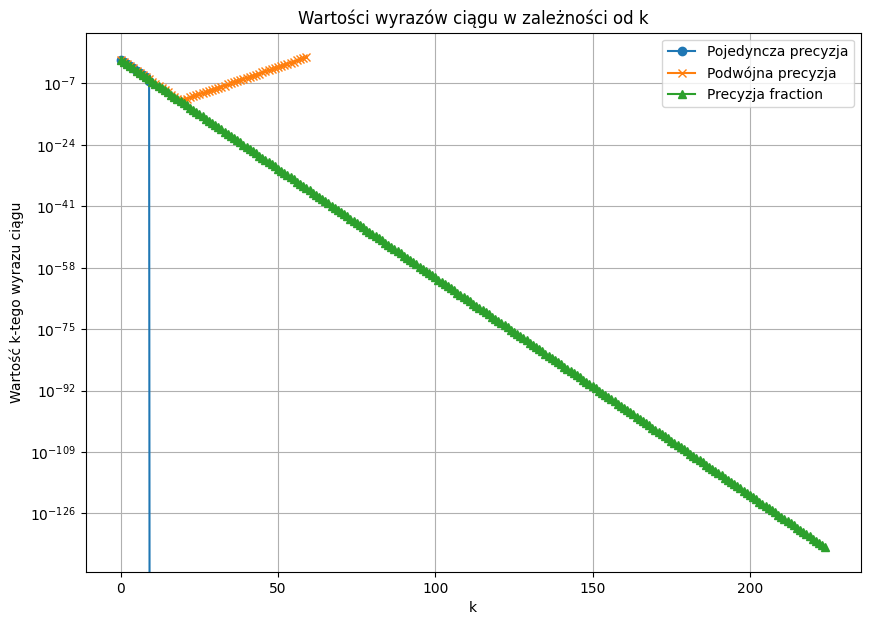

In [92]:
plt.figure(figsize=(10, 7))
plt.semilogy(range(n_single), single, label='Pojedyncza precyzja', marker='o')
plt.semilogy(range(n_double), double, label='Podwójna precyzja', marker='x')
plt.semilogy(range(n_fractions), fractions, label='Precyzja fraction', marker='^')


plt.xlabel('k')
plt.ylabel('Wartość k-tego wyrazu ciągu')
plt.title('Wartości wyrazów ciągu w zależności od k')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
def real_value(k):
    return (4.0**(-k)) / 3

def relative_error(sequence, real_value_func):
    k = np.arange(len(sequence))
    real_values = real_value_func(k)
    errors = np.abs(sequence - real_values) / real_values
    return errors

single_errors = relative_error(single, real_value)
double_errors = relative_error(double, real_value)
fraction_errors = relative_error(fractions, real_value)

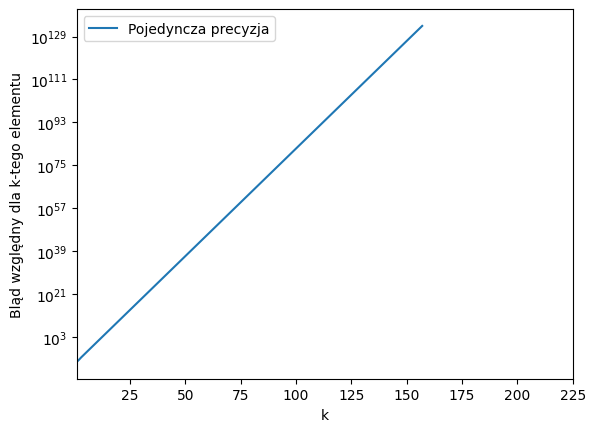

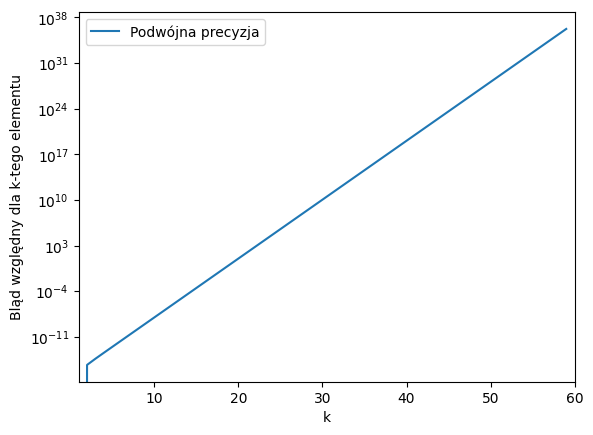

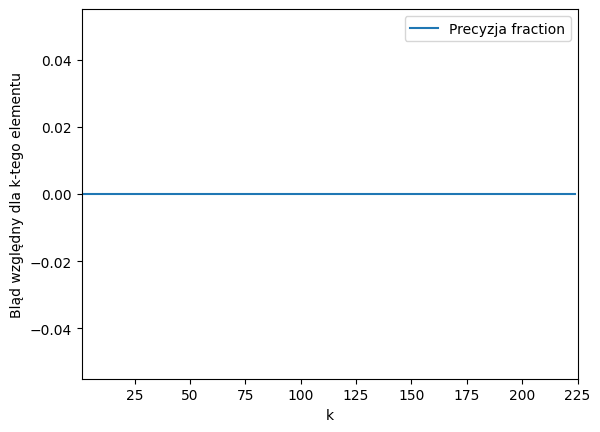

In [94]:
# Dla Single Precision
plt.plot(single_errors, label='Pojedyncza precyzja')
plt.xlabel('k')
plt.ylabel('Bląd względny dla k-tego elementu')
plt.yscale('log')
plt.legend()
plt.xlim(1, len(single_errors))
plt.show()

# Dla Double Precision
plt.plot(double_errors, label='Podwójna precyzja')
plt.xlabel('k')
plt.ylabel('Bląd względny dla k-tego elementu')
plt.yscale('log')
plt.legend()
plt.xlim(1, len(double_errors))
plt.show()

# Dla Fraction Precision
plt.plot(fraction_errors, label='Precyzja fraction')
plt.xlabel('k')
plt.ylabel('Bląd względny dla k-tego elementu')
plt.legend()
plt.xlim(1, len(fraction_errors))
plt.show()